# Image data exploration


</div></div></pre><h3>Key Outputs</h3><ul><li><strong>Bar Plot</strong>: Class distribution.</li><li><strong>Random Image Samples</strong>: To visually check data quality.</li><li><strong>Histograms</strong>: Pixel intensity and blur score distributions.</li></ul><p>This process will give you a clear understanding of your X-ray dataset and highlight any preprocessing needs before further tasks.</p></div></div></div></div>

In [4]:
from tabulate import tabulate
import os
import matplotlib.pyplot as plt
import pandas as pd
from src.utils.img_processing import class_distribution, img_data_overview
# merge metadata and calculated features
df_f = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\1_image_features.csv")
from src.defs import IMAGE_DIRECTORIES

df_f.head(20)
#df_f.shape[0]



#img_data_overview(image_directories=IMAGE_DIRECTORIES)

#class_distribution(image_directories=IMAGE_DIRECTORIES)


,file name,mean intensity,variance,blurriness,contrast,entropy
0,Viral Pneumonia-1,121.501806,3571.850829,152.128500,255,7.352938
1,Viral Pneumonia-10,132.666111,2411.610982,72.080780,203,7.293771
2,Viral Pneumonia-100,121.969989,4444.967086,100.927293,255,7.197722
3,Viral Pneumonia-1000,122.937305,4115.452015,127.567231,255,7.262119
4,Viral Pneumonia-1001,166.233778,2157.869308,64.225454,227,6.918518
5,Viral Pneumonia-1002,115.761054,4006.145386,205.734088,251,7.180291
6,Viral Pneumonia-1003,121.901187,3284.763382,155.880482,243,7.382567
7,Viral Pneumonia-1004,119.680060,1572.510148,33.765013,191,7.070130
8,Viral Pneumonia-1005,134.425678,3296.132106,57.647351,209,7.390741
9,Viral Pneumonia-1006,113.404492,3286.947336,38.003723,197,7.377500


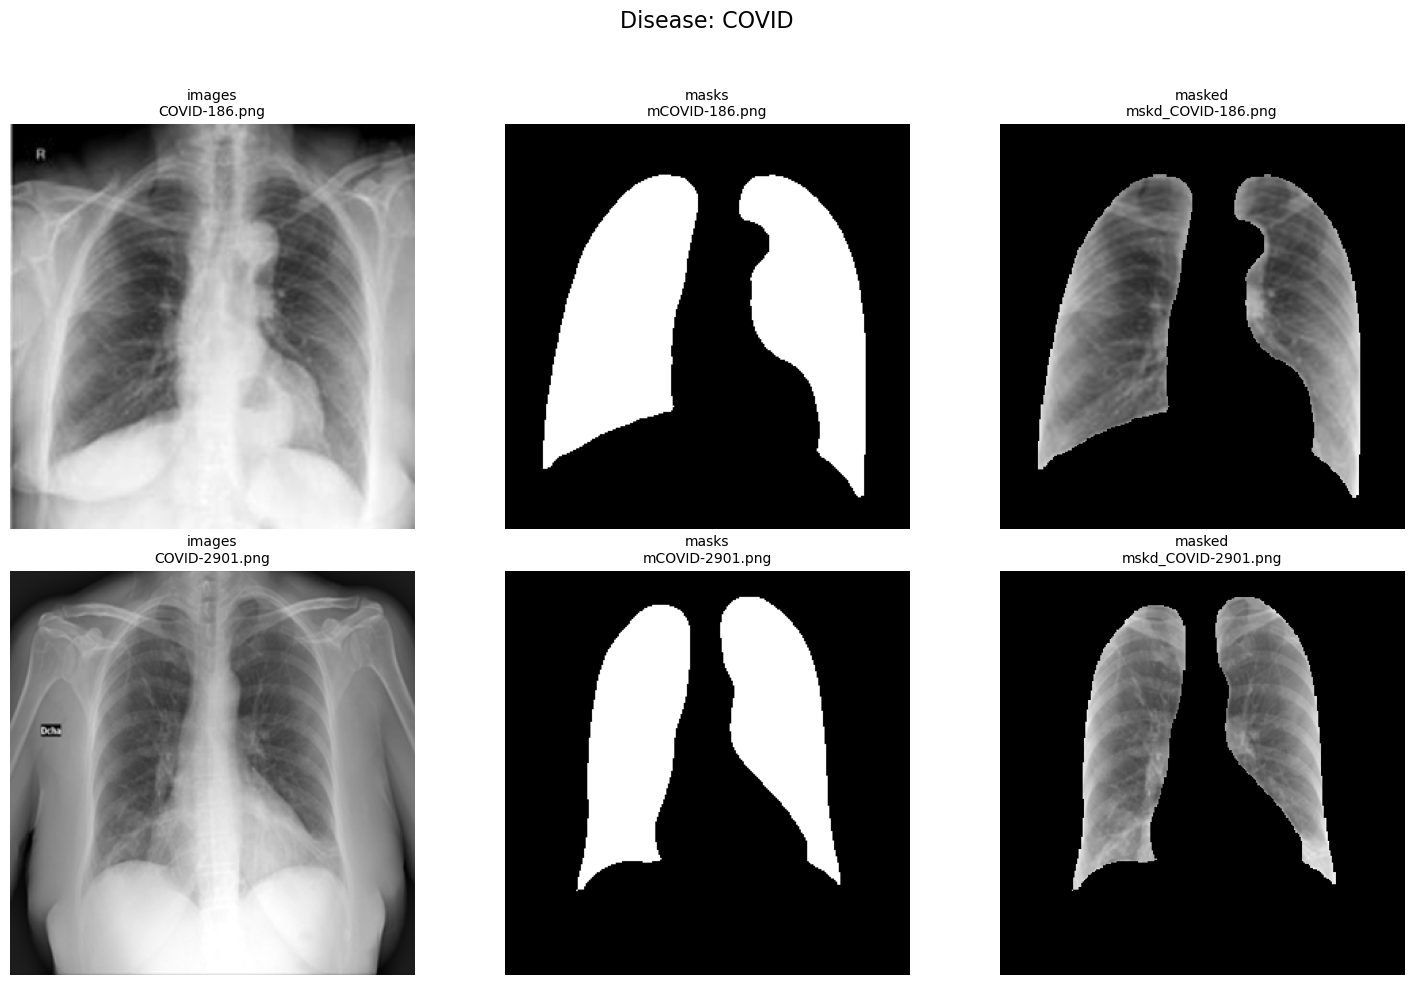

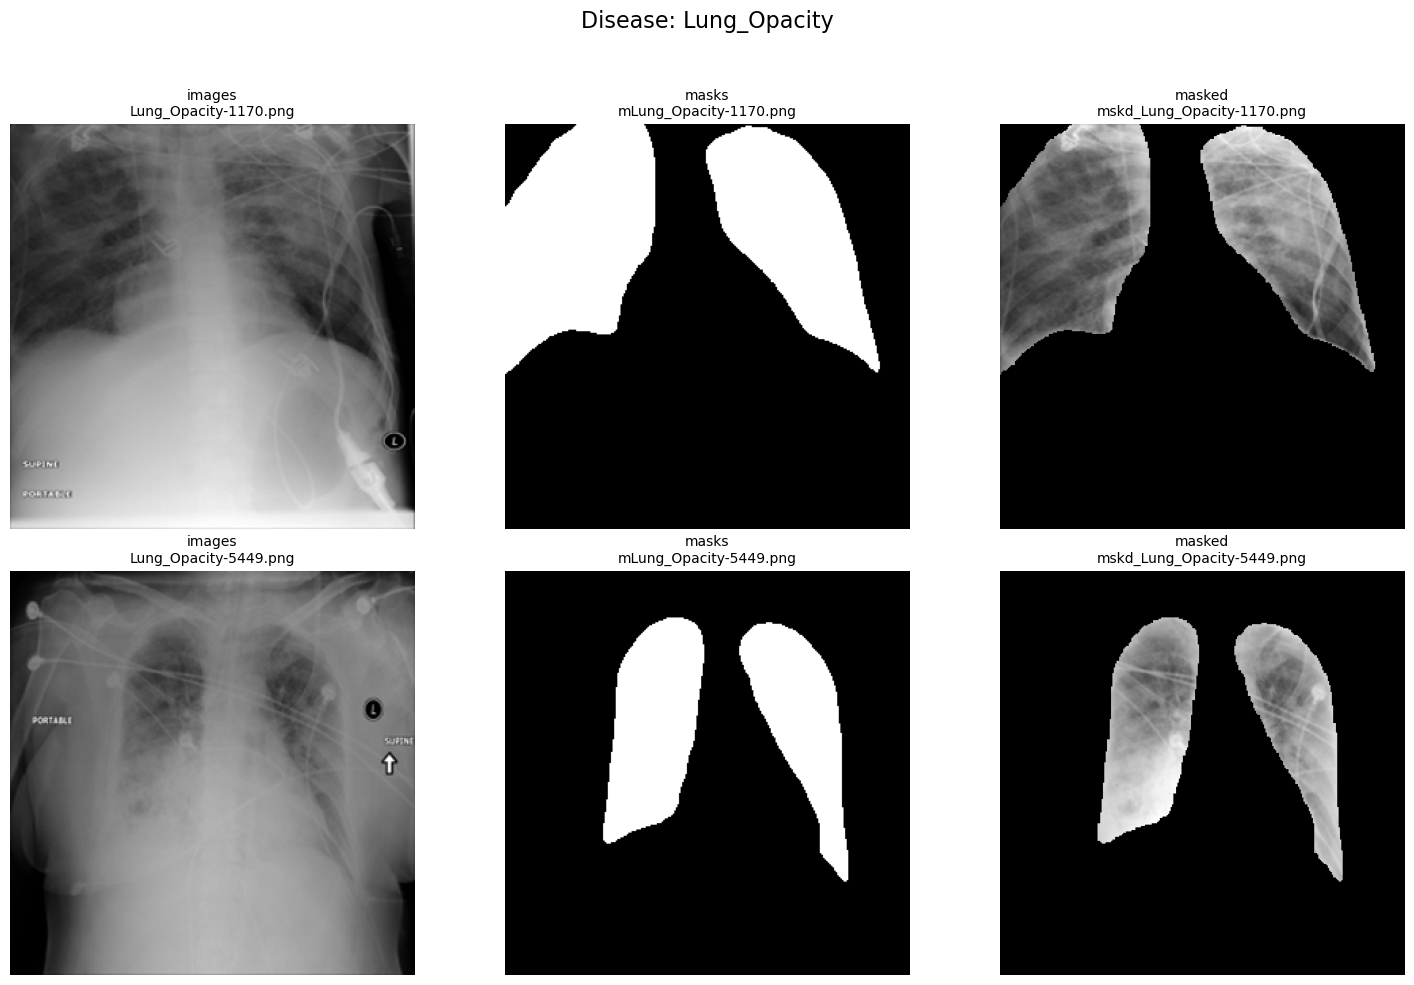

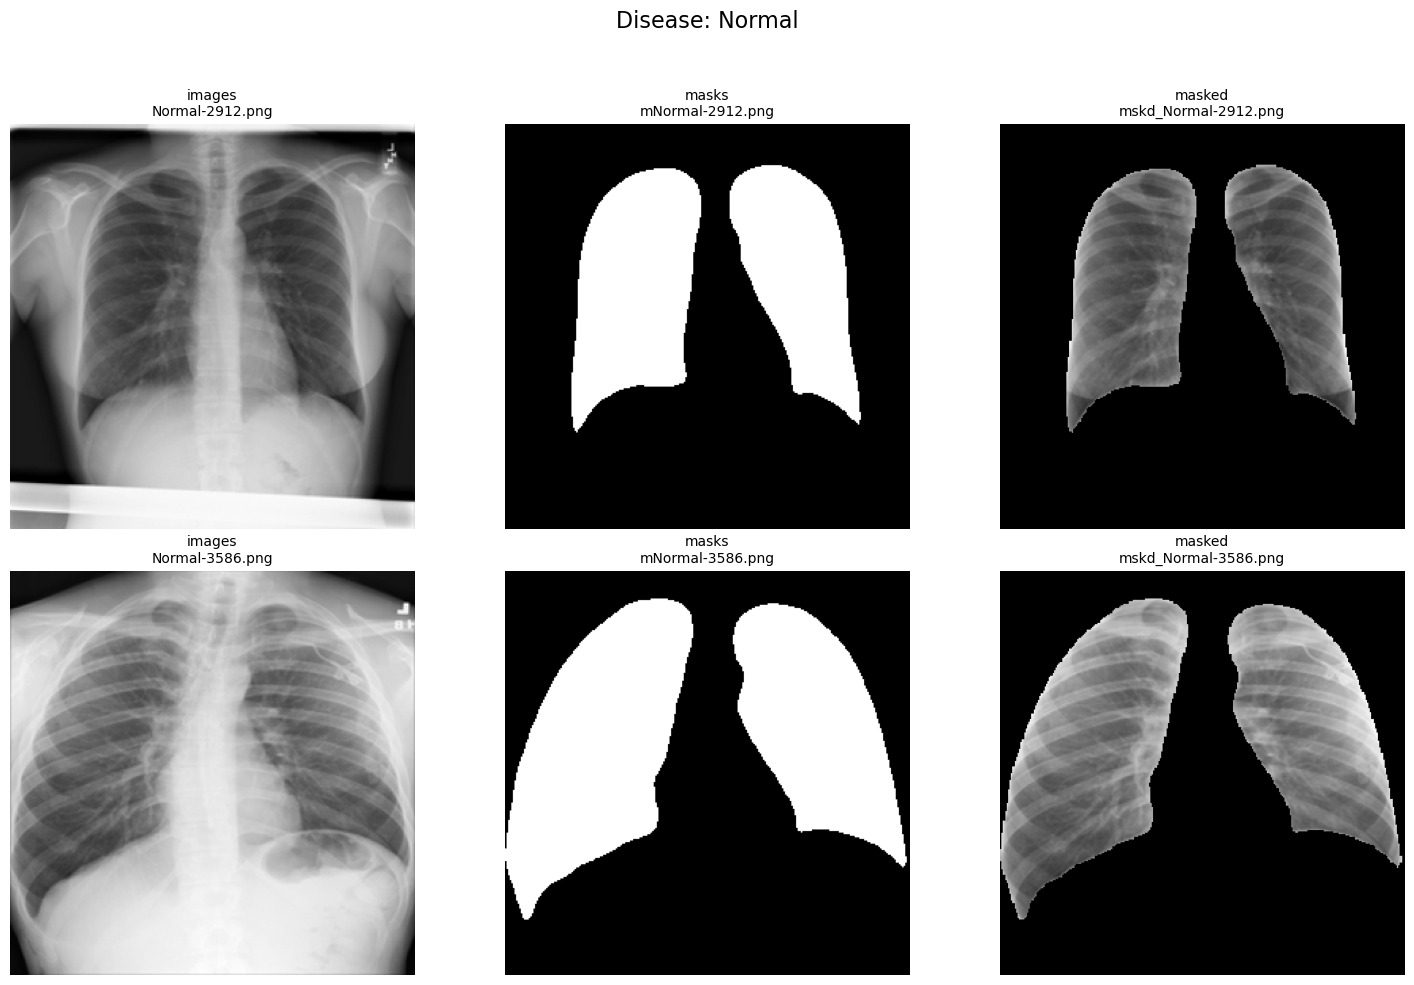

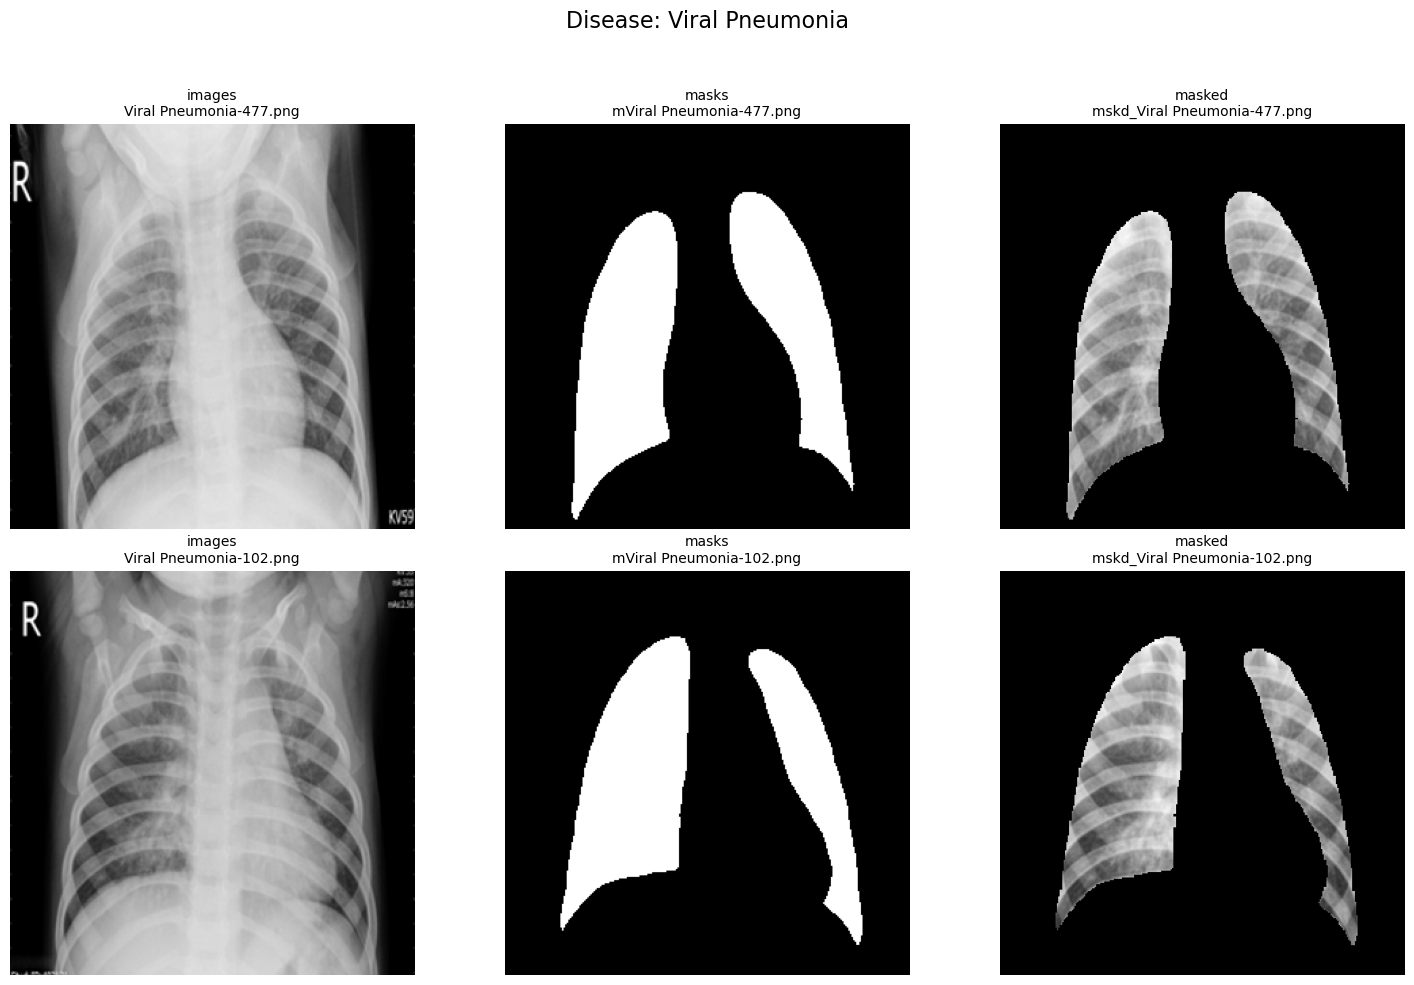

In [19]:
#-----image overview for each class/disease-----------

import os, random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from src.defs import IMAGE_DIRECTORIES, ImageType as it

def visualize_random_images(image_directories, n_samples_per_type=1):
    """
    Visualize N images for each image type (images, masks, masked), grouped by disease.

    Args:
        image_directories (dict): Dictionary containing disease names as keys and paths to image types as values.
        n_samples_per_type (int): Number of random samples to display for each image type.
    """
    
    # Iterate over each disease/class
    for disease, imgtypes in image_directories.items():
        fig, axes = plt.subplots(n_samples_per_type, 3, figsize=(15, 5 * n_samples_per_type))
        fig.suptitle(f"Disease: {disease}", fontsize=16)

        # Ensure axes is always 2D
        if n_samples_per_type == 1:
            axes = axes[:, np.newaxis]
        
        # count files in the image folder
        f_path = imgtypes[it.IMAGES]
        files_cnt = len([os.path.join(f_path, f) for f in os.listdir(f_path) if os.path.isfile(os.path.join(f_path, f))])         
        random_numbers = random.sample(range(files_cnt), n_samples_per_type)
        
        # Iterate over image types (images, masks, masked)
        for row, (type, folder_path) in enumerate(imgtypes.items()):
            
            image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            sampled_files = [image_files[i] for i in random_numbers]
            
            # Sample N random files (or fewer if not enough images available) per class/desease
            #sampled_files = np.random.choice(image_files, size=min(n_samples_per_type, len(image_files)), replace=False)
            
            # Display each sampled file
            for col, file_path in enumerate(sampled_files):
                img = Image.open(file_path).convert('L')  # Convert to grayscale
                axes[col][row].imshow(img, cmap='gray')
                axes[col][row].set_title(f"{type}\n{os.path.basename(file_path)}", fontsize=10)
                axes[col][row].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
        plt.show()


visualize_random_images(image_directories=IMAGE_DIRECTORIES, n_samples_per_type=2)

In [15]:
random.sample(range(len(range(20))), 3), *range(20)

([18, 8, 10],
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19)

## Checking image data consistency and quality
* check for duplicates acros 4 categories: same picture but different file name
* check for extraordinary features like frames, torsion, misscaling 

In [ ]:
from src.utils.img_processing import get_greyscale_image_metrics
from src.defs import IMAGE_DIRECTORIES, ImageType as it, DiseaseCategory
import pandas as pd


#------calculate image metrics like mean intensity,  variance, blurriness, contrast and shanon entropy

def get_img_metrics():

    df_img_feature_list = []  # Use a list to collect DataFrames before concatenation
    
    # Path to directory containing images
    for cat in DiseaseCategory:
        
        image_directory = IMAGE_DIRECTORIES[cat][it.IMAGES]
        df = get_greyscale_image_metrics(image_directory)
        df_img_feature_list.append(df)
              
    # Concatenate all DataFrames in the list
    df_img_metrics = pd.concat(df_img_feature_list, ignore_index=True)
        
    return df_img_metrics

df_img_metrics = None


try:
    df_img_metrics = get_img_metrics()
    # Save features to CSV files
    df_img_metrics.to_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\1_image_features.csv", index=False)
    pass
except Exception as e:
    print(e)
    
df_f = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\1_image_features.csv")
df_f.head(20)

In [3]:
# --find equivalent image features for the images in the dataset--
import pandas as pd
df_f = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\1_image_features.csv")

#----Quick: Find duplicates in specified columns
#duplicates = df_f[df_f.duplicated(subset=['mean intensity', 'variance', 'blurriness', 'contrast'], keep=False)]
#duplicates.groupby(['mean intensity', 'variance', 'blurriness', 'contrast']).size().reset_index(name='count')

#----Detailed: Find duplicates in all features' columns

def detect_duplicates(df):
    # Initialize new columns
    df['duplicates in'] = ''
    df['related files'] = ''

    # Columns to check for duplicates
    columns_to_check = ['mean intensity', 'variance', 'blurriness', 'contrast']

    # Iterate through rows to find duplicates
    for idx, row in df.iterrows():
        # Create a boolean mask for duplicates
        mask = (df[columns_to_check] == row[columns_to_check]).all(axis=1) & (df['file name'] != row['file name'])

        # Find duplicate rows
        duplicate_rows = df[mask]

        if not duplicate_rows.empty:
            # Add duplicate column names
            duplicate_columns = [col for col in columns_to_check if df[col].duplicated(keep=False).any()]
            df.at[idx, 'duplicates in'] = ', '.join(duplicate_columns)

            # Add related file names
            related_files = duplicate_rows['file name'].tolist()
            df.at[idx, 'related files'] = ', '.join(related_files)

    return df

# Detect duplicates
df_with_duplicates = detect_duplicates(df_f)

In [ ]:
import pandas as pd
# ---save the dataframe with duplicates to a CSV file and check out the duplicates
df_with_duplicates.to_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\2_image_features_with_duplicates.csv", index=False)

df_with_duplicates = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\2_image_features_with_duplicates.csv")   
df_with_duplicates.head(20)

In [ ]:
import numpy as np
import pandas as pd

#----Filter and save rows where 'duplicates in' or 'related files' columns contains values

df_duplicates_only = df_with_duplicates[
    (pd.notna(df_with_duplicates['duplicates in'])) | (pd.notna(df_with_duplicates['related files']))
]
df_duplicates_only
df_duplicates_only.to_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\3_image_duplicates_only.csv", index=False)

### Checking image duplicates

In [ ]:
import pandas as pd

#----check duplicates----

df_duplicates_only = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\3_image_duplicates_only.csv")

check_all_dupkicates = True

if check_all_dupkicates:
    # Set the option to display all rows
    pd.set_option('display.max_rows', None)
else:
    # Reset 'display.max_rows' to default
    pd.reset_option('display.max_rows')
    
df_duplicates_only.sort_values(by="file name", inplace=True, ascending=True)


In [ ]:
#----Visual checkout of duplicates----

import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from src.defs import IMAGE_DIRECTORIES, ImageType as it, DiseaseCategory

def visualize_duplicates(duplicates_df, image_directories=IMAGE_DIRECTORIES):
    
    df_duplicates_only.sort_values(by="file name", inplace=True, ascending=True)
    
    for _, row in duplicates_df.iterrows():
        # Gather file names to display (main file and its duplicates)
        file_names = [row['file name']] + row['related files'].split(', ')

        # Number of images to display
        num_images = len(file_names)

        # Create a subplot with one row and as many columns as there are images
        fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

        if num_images == 1:
            axes = [axes]  # Ensure axes is always iterable
            
        for ax, file_name in zip(axes, file_names):
            
            # Path to directory containing images
            image_directory = IMAGE_DIRECTORIES[file_name.split("-")[0]][it.IMAGES]
            
            # Load and display the image
            file_path = os.path.join(image_directory, file_name+'.png')
            
            print(file_path)
            
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                ax.imshow(image, cmap='gray')
                ax.set_title(file_name)
                ax.axis('off')
            else:
                ax.set_title(f"{file_name} (Not Found)")
                ax.axis('off')

        plt.tight_layout()
        plt.show()


df_duplicates_only = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\3_image_duplicates_only.csv")

# Visualize duplicates
visualize_duplicates(df_duplicates_only)


### How to proceed with duplicates?
There are only duplicates along the same category 
e.g. Normal-818 duplicates Normal-817 or COVID-3376 dupllicates COVID-3373, COVID-3374, COVID-3375.
Because the cross-category duplicates like COVID-xyz duplicates Normal-abc etc. are not available the
solution is to remove the duplicates.

In [ ]:
#---droping duplicates----

import pandas as pd

df_f = pd.read_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\1_image_features.csv")

# Drop duplicates
df_f.drop_duplicates(subset=['mean intensity', 'variance', 'blurriness', 'contrast'], keep='first', inplace=True)

# recheck for duplicates
df_f.duplicated(subset=['mean intensity', 'variance', 'blurriness', 'contrast']).sum()

# Save to CSV
df_f.to_csv(r"D:\DataScience\area51\data\COVID-19_Radiography_Dataset\4_image_features_no_duplicates.csv", index=False)